<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Momentum_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install yfinance

In [133]:
# import necessary packages
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
from pandas.tseries.offsets import MonthEnd

In [134]:
symbols=pd.read_csv('https://raw.githubusercontent.com/anirbanghoshsbi/nifty500/main/ind_nifty500list.csv')

In [135]:
symbols['data']=symbols.Symbol+'.NS'


In [136]:
ticker=symbols.data.tolist()

In [137]:
# Get ticker symbol for NSE 50 stocks
#symbols=pd.read_html('https://in.finance.yahoo.com/quote/%5ENSEI/components?p=%5ENSEI')[0]
#ticker=symbols.Symbol.to_list()


In [138]:
#symbols=pd.read_html('https://www.moneycontrol.com/financials/tatasteel/balance-sheetVI/TIS#TIS')

In [139]:
#symbols[0]

In [140]:
#Get the NSE Component prices
start_date = dt.datetime(2018,1,31)
end_date= dt.datetime(2022,9,30)
formation=dt.datetime(2022,10,1)
df =yf.download(ticker,start_date,end_date)['Adj Close']

[*********************100%***********************]  501 of 501 completed

10 Failed downloads:
- ORIENTREF.NS: No timezone found, symbol may be delisted
- ANGELBRKG.NS: No timezone found, symbol may be delisted
- WABCOINDIA.NS: No timezone found, symbol may be delisted
- MINDAIND.NS: No timezone found, symbol may be delisted
- MOTHERSUMI.NS: No timezone found, symbol may be delisted
- MINDTREE.NS: No timezone found, symbol may be delisted
- CADILAHC.NS: No timezone found, symbol may be delisted
- SUPPETRO.NS: No timezone found, symbol may be delisted
- BURGERKING.NS: No timezone found, symbol may be delisted
- PHILIPCARB.NS: No timezone found, symbol may be delisted


In [141]:
df.to_csv('data_500.csv')

In [142]:
# Get daily return and then cummulate it to monthly/Quartelry/Half yealrly /Annually return
monthly_return = df.pct_change().resample('M').agg(lambda x:(x+1).prod()-1)
#quarterly_return = df.pct_change().resample('Q').agg(lambda x:(x+1).prod()-1)
#halfyearly_return = df.pct_change().resample('H').agg(lambda x:(x+1).prod()-1)
#annual_return= df.pct_change().resample('Y').agg(lambda x:(x+1).prod()-1)


In [143]:
#Calculate returns over last 11 months to 6 months
past_11 = (monthly_return+1).rolling(11).apply(np.prod)-1
past_10 = (monthly_return+1).rolling(10).apply(np.prod)-1
past_9 = (monthly_return+1).rolling(9).apply(np.prod)-1
past_8 = (monthly_return+1).rolling(8).apply(np.prod)-1
past_7 = (monthly_return+1).rolling(7).apply(np.prod)-1
past_6 = (monthly_return+1).rolling(6).apply(np.prod)-1

In [144]:
#past_q_1= (quarterly_return+1).rolling(3).apply(np.prod)-1
#past_q_2= (quarterly_return+1).rolling(6).apply(np.prod)-1
#past_q_3= (quarterly_return+1).rolling(9).apply(np.prod)-1

In [145]:
from pandas.tseries.offsets import MonthEnd
end_measurement11= formation- MonthEnd(1)
end_measurement10 = formation-MonthEnd(2)

end_measurement09 = formation-MonthEnd(3)
end_measurement08 = formation-MonthEnd(4)
end_measurement07 = formation-MonthEnd(5)
end_measurement06 = formation-MonthEnd(6)

In [146]:
end_measurement11

Timestamp('2022-09-30 00:00:00')

In [147]:
past_11.tail(2)

,3MINDIA.NS,AARTIDRUGS.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ACC.NS,ADANIENT.NS,...,WELCORP.NS,WELSPUNIND.NS,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,WOCKPHARMA.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZYDUSWELL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-31 00:00:00+05:30,-0.061136,-0.288115,-0.104763,-0.111484,0.752954,-0.074979,0.013304,0.241932,0.048316,1.176765,...,0.596343,-0.544214,0.143122,-0.199071,-0.341316,-0.470148,0.310757,-0.152210,-0.508346,-0.321649
2022-09-30 00:00:00+05:30,-0.051737,-0.206234,-0.235970,-0.228242,0.420441,-0.031074,0.134436,0.285741,0.045615,1.439010,...,1.052305,-0.467273,0.200414,-0.256030,-0.386602,-0.435531,0.210937,-0.156558,-0.537205,-0.216159


In [148]:
ret_12 = past_11.loc[end_measurement11]

<ipython-input-148-fb7a2e9ba45d>:1: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  ret_12 = past_11.loc[end_measurement11]


In [149]:
ret_11 = past_10.loc[end_measurement10]
ret_10 = past_9.loc[end_measurement09]
ret_09 = past_8.loc[end_measurement08]
ret_08 = past_7.loc[end_measurement07]
ret_07 = past_6.loc[end_measurement06]


<ipython-input-149-520d826942cc>:1: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  ret_11 = past_10.loc[end_measurement10]
<ipython-input-149-520d826942cc>:2: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  ret_10 = past_9.loc[end_measurement09]
<ipython-input-149-520d826942cc>:3: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  ret_09 = past_8.loc[end_measurement08]
<ipython-input-149-520d826942cc>:4: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.


In [150]:
ret_12=ret_12.reset_index()
ret_11=ret_11.reset_index()
ret_10=ret_10.reset_index()
ret_09=ret_09.reset_index()
ret_08=ret_08.reset_index()
ret_07=ret_07.reset_index()

In [151]:
ret_12['quintile'] = pd.qcut(ret_12.iloc[:,1],10,labels=False)
ret_11['quintile'] = pd.qcut(ret_11.iloc[:,1],10,labels=False)
ret_10['quintile'] = pd.qcut(ret_10.iloc[:,1],10,labels=False)
ret_09['quintile'] = pd.qcut(ret_09.iloc[:,1],10,labels=False)
ret_08['quintile'] = pd.qcut(ret_08.iloc[:,1],10,labels=False)
ret_07['quintile'] = pd.qcut(ret_07.iloc[:,1],10,labels=False)

In [152]:
winners12= ret_12[ret_12.quintile==9]
winners11= ret_11[ret_11.quintile==9]
winners10= ret_10[ret_10.quintile==9]
winners9= ret_09[ret_09.quintile==9]
winners08= ret_08[ret_08.quintile==9]
winners07= ret_07[ret_07.quintile==9]

In [153]:
# Getting Common Winners

from functools import reduce # python 3 only
final_winner=reduce(np.intersect1d, [winners12.index,winners11.index,\
                                      winners10.index,winners9.index,\
                                      winners08.index,winners07.index])

final_winner=final_winner.tolist()

In [154]:
cols=[]
for ind in final_winner:
  print(df.columns[ind])
  cols.append(df.columns[ind])

ADANIENT.NS
ADANIGREEN.NS
ATGL.NS
BDL.NS
CREDITACC.NS
ELGIEQUIP.NS
FINEORG.NS
FLUOROCHEM.NS
GAEL.NS
INDHOTEL.NS
INGERRAND.NS
JKPAPER.NS
KEI.NS
KPITTECH.NS
POWERINDIA.NS
RAYMOND.NS
SCHAEFFLER.NS
SHARDACROP.NS
SHOPERSTOP.NS
SWANENERGY.NS
TATAELXSI.NS
THERMAX.NS
WELCORP.NS


In [155]:
features={'scripname':cols}
final_data=pd.DataFrame(features)

In [156]:
final_data['Date']=formation

In [157]:
final_data.to_csv('data.csv')

In [158]:
len(cols)

23

In [159]:
final_ticker_list=pd.read_csv('data.csv')

In [160]:
final_ticker=final_ticker_list.scripname.tolist()

In [161]:
#Get the NSE Component prices
start_date = dt.datetime(2022,10,1)
end_date= dt.datetime(2022,10,31)
df_invest =yf.download(final_ticker,start_date,end_date)['Adj Close']

[*********************100%***********************]  23 of 23 completed


In [162]:
# How many stocks are in your portfolio?
numstocks = len(df_invest)

# Create an array of equal weights across all assets
portfolio_weights_ew =np.repeat(1,numstocks)

# Calculate the equally-weighted portfolio returns
df_invest['Portfolio_EW'] = df_invest.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
#cumulative_returns_plot(['Portfolio', 'Portfolio_EW'])

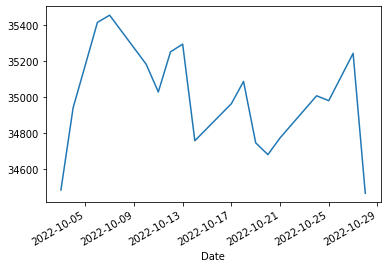

In [163]:
df_invest['Portfolio_EW'].plot();

In [164]:
print(f'return : {(np.round(np.subtract(df_invest.iloc[:,-1][-1],df_invest.iloc[:,-1][0])/df_invest.iloc[:,-1][0]*100))} % in the next 30 days')

return : -0.0 % in the next 30 days
